In [194]:
# -*- coding:utf-8 -*-
import sys, os
import glob
from tqdm import tqdm
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
print("python version: " + sys.version)
print("pandas version: " + pd.__version__)
print("seaborn version: " + sns.__version__)

python version: 2.7.12 (default, Dec  4 2017, 14:50:18) 
[GCC 5.4.0 20160609]
pandas version: 0.22.0
seaborn version: 0.7.1


In [196]:
os.chdir('/home/jeffl/Dropbox/school/prob-solv/project')
print(os.getcwd())

/home/jeffl/Dropbox/school/prob-solv/project


In [197]:
agora_dir = "data/agora"
abundances_dir = "data/hmp-abundances"
out_dir = "outputs/abundances"

## Overview and Goal
The goal of this notebook is to get relative abundance levels for each of our models to be able to better 1) choose representative species and 2) validate our models.

## Publications and links:
  - HMP 2017 update: https://www.nature.com/articles/nature23889
  - HMP resources: https://www.hmpdacc.org/resources/data_browser.php
    - HMP metaphlan2 output: https://www.hmpdacc.org/hmp/hmsmcp2/
    - metaphlan2: http://huttenhower.sph.harvard.edu/metaphlan2

## PlAn
### Map to AGORA species
Rather than try to figure out my own method to compute abundances given a metagenomics sample, I'm going to use the output of MetaPlhAn2 run on the human microbiome project (HMP) samples, and try to map the species and strain names to the AGORA species.
Hopefully most of them will map. If not, I may need to come up with another approach.

### Relative abundance for each cluster
If we are using my clusters, I will need to get a relative abundance for that cluster by combining the relative abundance of each of the individual species. 

### Map to AGORA species - Initial testing

In [198]:
microbes_df = pd.read_csv("%s/microbes-formatted.tsv" % (agora_dir), sep="\t", index_col=0)
microbes_df.head()

,organism,seedid,kingdom,phylum,mclass,order,family,genus,oxygenstat,metabolism,...,genes,reactions,metabolites,draftcreator,draftcreated,phenotype,imgid,ncbiid,platform,kbaseid
0,Abiotrophia_defectiva_ATCC_49176,Abiotrophia_defectiva_ATCC_49176_592010_4,Bacteria,Firmicutes,Bacilli,Lactobacillales,Aerococcaceae,Abiotrophia,Facultative_anaerobe,Saccharolytic_fermentative_or_respiratory,...,598,1069,840,Eugen_Bauer,07_01_14,1.0,2.562617e+09,592010.0,ModelSEED,NaN
1,Acidaminococcus_intestini_RyC_MR95,Acidaminococcus_intestini_RyC_MR95_568816_4,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Obligate_anaerobe,Asaccharolytic_glutamate_is_fermented,...,599,994,827,Eugen_Bauer,08_03_14,4.0,2.511231e+09,568816.0,Kbase,NaN
2,Acidaminococcus_sp_D21,Acidaminococcus_sp_D21_563191_3,Bacteria,Firmicutes,Negativicutes,Selenomonadales,Acidaminococcaceae,Acidaminococcus,Obligate_anaerobe,Asaccharolytic_glutamate_is_fermented,...,598,851,768,Ines_Thiele,06_29_12,3.0,6.438861e+08,563191.0,Kbase,NaN
3,Acinetobacter_junii_SH205,Acinetobacter_junii_SH205_575587_3,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Moraxellaceae,Acinetobacter,Aerobe,Strictly_respiratory_amino_acids_utilized,...,817,1289,950,Ines_Thiele,06_29_12,5.0,6.462063e+08,575587.0,ModelSEED,NaN
4,Actinomyces_odontolyticus_ATCC_17982,Actinomyces_odontolyticus_ATCC_17982_411466_7,Bacteria,Actinobacteria,Actinobacteria,Actinomycetales,Actinomycetaceae,Actinomyces,Facultative_anaerobe,Saccharolytic_fermentative,...,586,854,692,Ines_Thiele,06_29_12,5.0,6.409631e+08,411466.0,Kbase,NaN


Let's see if some of them match
- Abiotrophia_defectiva_ATCC_49176
  - species: Y (Abiotrophia_defectiva), strain: N
- Acidaminococcus_sp_D21
  - species: Y (Acidaminococcus_sp_D21)
- Shigella_sonnei_Ss046
  - species: Y (Shigella_sonnei), strain: N
- Mesorhizobium_loti_MAFF303099
  - species: N; Mesorhizobium_unclassified

In the abundances file

In [199]:
# tab separated file output by metaphlan
# see their documentation for a description of the columns
# https://bitbucket.org/biobakery/biobakery/wiki/metaphlan2#rst-header-output-files
# abundances_dir = "human-microbiome-project/abundances"
abundances_file = "%s/hmp1-II_metaphlan2-mtd-qcd.pcl" % (abundances_dir)

In [200]:
species_table_file = "%s/merged_abundance_table_species.txt" % (abundances_dir)
# !head -n 9 $abundances_file > $species_table_file
# !grep -E "(s__)|(^ID)" $abundances_file | grep -v "t__" | sed 's/^.*s__//g' >> $species_table_file
species_file = "%s/species.txt" % (abundances_dir)
# !cut -f 1 $species_table_file | sort -u > $species_file
# !head $species_file

In [6]:
family_file = "%s/families.txt" % (abundances_dir)
!grep -E "(f__)|(^ID)" $abundances_file | grep -v "t__" | grep -v "s__" | grep -v "g__" | sed 's/^.*f__//g' | cut -f 1 | sort -u > $family_file
!head $family_file

Acetobacteraceae
Acholeplasmataceae
Acidaminococcaceae
Acidobacteriaceae
Acidobacteria_noname
Actinomycetaceae
Adenoviridae
Aerococcaceae
Aeromonadaceae
Alcaligenaceae


In [201]:
# make some plots of the abundances summarized at the phylum level
phylum_table_file = "%s/phylum-abundances.txt" % (abundances_dir)
# !head -n 9 $abundances_file > $phylum_table_file
# !grep -E "(p__)|(^ID)" $abundances_file | grep "Bacteria" | grep -v "t__\|s__\|g__\|f__\|o__\|c__" | sed 's/^.*p__//g' >> $phylum_table_file

### Mapping
Now actually try to perform the mapping

Maybe I could use UniProt to map to species and then to specific models?

In [202]:
# now try to perform the mapping
agora_species_series = microbes_df.organism
agora_species = set(agora_species_series.tolist())
#print(agora_species.tolist())
metaphlan_species = set()
with open(species_file, 'r') as f:
    for line in f:
        metaphlan_species.add(line.rstrip())

print("%d agora species, %d metaphlan_species" % (len(agora_species), len(metaphlan_species)))

818 agora species, 960 metaphlan_species


In [20]:
print("naive set intersection: %d in common" % (len(agora_species & metaphlan_species)))
metaphlan_genus = set(s.split('_')[0] for s in metaphlan_species)
agora_genus = set(s.split('_')[0] for s in agora_species)
print("genus in common: %d out of %d in metaplahn, %d agora" % (len(metaphlan_genus & agora_genus), len(metaphlan_genus), len(agora_genus)))

naive set intersection: 23 in common
genus in common: 155 out of 301 in metaplahn, 215 agora


In [21]:
print("unique genera to agora:")
print(agora_genus - metaphlan_genus)

unique genera to agora:
set(['Cloacibacillus', 'Cedecea', 'Sulfolobus', 'Brevibacillus', 'Nevskia', 'Kallipyga', 'Melainabacterium', 'Ureibacillus', 'Leminorella', 'Arcanobacterium', 'Arcobacter', 'Kurthia', 'Dermacoccus', 'Cetobacterium', 'Rhodococcus', 'Rudanella', 'Spirosoma', 'Succinatimonas', 'Paenibacillus', 'Aneurinibacillus', 'Trabulsiella', 'Laribacter', 'Microbacterium', 'Plesiomonas', 'Pseudobutyrivibrio', 'Cellulosimicrobium', 'Salmonella', 'Lysinibacillus', 'Brochothrix', 'Ochrobactrum', 'Grimontia', 'Exiguobacterium', 'Stoquefichus', 'Blastococcus', 'Oceanobacillus', 'Kandleria', 'Arthrobacter', 'Kytococcus', 'Tatumella', 'Kluyvera', 'Trueperella', 'Yokenella', 'Dyadobacter', 'Edwardsiella', 'Alcaligenes', 'Lachnospira', 'Geobacillus', 'Methanomassiliicoccus', 'Succinivibrio', 'Silanimonas', 'Anaerobaculum', 'Anaerobiospirillum', 'Providencia', 'Halococcus', 'Hafnia', 'Micromonospora', 'Tropheryma', 'Cellulosilyticum', 'Schlesneria', 'Methylobacterium'])


In [22]:
agora_families = set(microbes_df.family.tolist())
metaphlan_families = set()
with open(family_file, 'r') as f:
    for line in f:
        metaphlan_families.add(line.rstrip())
print("%d agora families, %d metaphlan families" % (len(agora_families), len(metaphlan_families)))
print("families intersection: %d" % (len(agora_families & metaphlan_families)))

NameError: name 'family_file' is not defined

In [203]:
# just check if one model's name is in the name or vice-versa
map_agora_to_metaphlan = {}
for m1 in agora_species:
    for m2 in metaphlan_species:
        if m1 in m2:
            if m1 in map_agora_to_metaphlan:
                print("%s already in map_agora_to_metaphlan: %s" % (m1, map_agora_to_metaphlan[m1]))
            map_agora_to_metaphlan[m1] = m2
        elif m2 in m1:
            if m1 in map_agora_to_metaphlan:
                print("%s already in map_agora_to_metaphlan: %s" % (m1, map_agora_to_metaphlan[m1]))
            map_agora_to_metaphlan[m1] = m2
            
print("%d agora species map to %d metaphlan species" % (len(map_agora_to_metaphlan), len(set(map_agora_to_metaphlan.values()))))
print("adding unclassified metaphlan species")
for m1 in agora_species:
    for m2 in metaphlan_species: 
        if m1 not in map_agora_to_metaphlan and 'unclassified' in m2 and m1.split('_')[0] == m2.split('_')[0]:
            map_agora_to_metaphlan[m1] = m2
            
print("%d agora species map to %d metaphlan species" % (len(map_agora_to_metaphlan), len(set(map_agora_to_metaphlan.values()))))
#print(map_agora_to_metaphlan)
out_file = "%s/map-agora-to-metaphlan.tsv" % (out_dir)
print("writing to %s" % (out_file))
s = pd.Series(map_agora_to_metaphlan)
s.to_csv(out_file, sep='\t')#, headers=['agora', 'metaphlan'])

465 agora species map to 375 metaphlan species
adding unclassified metaphlan species
528 agora species map to 412 metaphlan species
writing to outputs/abundances/map-agora-to-metaphlan.tsv


In [213]:
metaphlan_species = set(map_agora_to_metaphlan.values())
metaphlan_to_agora = {map_agora_to_metaphlan[s]: s for s in map_agora_to_metaphlan}

In [205]:
# keep a single agora strain for each of the species
# with some special cases
fixed_strain = {'Escherichia_coli': 'Escherichia_coli_O157_H7_str_Sakai'}
species_seen = set()
new_map = {}
for s, s2 in map_agora_to_metaphlan.items():
    if s2 in species_seen:
        continue
    if s2 in fixed_strain and s != fixed_strain[s2]:
        continue
    new_map[s] = s2
    species_seen.add(s2)

# TODO count the number of strans that map to the same species.
# Is just choosing one random model the best approach?
map_agora_to_metaphlan = new_map
    
out_file = "%s/map-agora-to-metaphlan-unique.tsv" % (out_dir)
print("writing to %s" % (out_file))
s = pd.Series(map_agora_to_metaphlan)
s.to_csv(out_file, sep='\t')#, headers=['agora', 'metaphlan'])

writing to outputs/abundances/map-agora-to-metaphlan-unique.tsv


In [221]:
# now get the relative abundance for each of these species.
# if there is only one member of the genus present, then would I just sum the other species of that genus? (and up to family, order, and so on?)
# start off with a single ID
srs_ids = ['SRS011084']
# read in the abundances file
df = pd.read_csv(species_table_file, sep='\t', header=[0,1,2,3,4,5,6,7,8], index_col=0)
# keep only the srs_ids
df.head()

SN,700014562,700014724,700014733,700014739,700014751,700014778,700014803,700014815,700014827,700014837,...,700166870,700123135,700097482,700166880,700161335,700098267,700097291,700032257,700016920,700016601
RANDSID,158458797,158479027,158458797,158458797,158458797,158458797,158479027,158479027,158479027,158499257,...,160987560,161068481,161473083,160987560,366487741,158742018,158013734,159753524,159389382,159227541
VISNO,1,1,1,1,1,1,1,1,1,1,...,3,2,1,3,1,2,02S,1,1,1
STArea,Gut,Gut,Oral,Oral,Oral,Vaginal,Oral,Oral,Skin,Gut,...,Oral,Gut,Gut,Skin,Oral,Gut,Gut,Oral,Skin,Skin
STSite,Stool,Stool,Tongue_dorsum,Buccal_mucosa,Supragingival_plaque,Posterior_fornix,Tongue_dorsum,Supragingival_plaque,Anterior_nares,Stool,...,Buccal_mucosa,Stool,Stool,Anterior_nares,Supragingival_plaque,Stool,Stool,Tongue_dorsum,Anterior_nares,Anterior_nares
SNPRNT,700014555,700014718,700014731,700014737,700014749,700014776,700014785,700014791,700014797,700014832,...,700166870,700123135,700097482,700166880,700161335,700098267,700097291,700032228,700016920,700016560
Gender,Female,Male,Female,Female,Female,Female,Male,Male,Male,Male,...,Male,Male,Female,Male,Female,Female,Female,Female,Male,Female
WMSPhase,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
SRS,SRS011061,SRS011084,SRS011086,SRS011090,SRS011098,SRS011111,SRS011115,SRS011126,SRS011132,SRS011134,...,SRS893381,SRS893382,SRS893383,SRS893384,SRS893385,SRS971275,SRS971276,SRS971277,SRS971427,SRS971428
Methanobrevibacter_smithii,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000825,...,0.0,0.0,0.00038,0.0,0.0,0.000968,0.000228,0.0,0.0,0.0
Methanobrevibacter_unclassified,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.00016,0.0,0.0,0.000189,0.000152,0.0,0.0,0.0


In [222]:
gut_samples = df.xs('Gut', axis=1, level="STArea", drop_level=False)
print("%d gut samples" % (len(gut_samples.columns)))
gut_samples.head()

553 gut samples


SN,700014562,700014724,700014837,700015181,700015250,700015415,700015981,700016142,700016610,700033153,...,700172346,700097973,700167759,700163419,700161342,700166862,700123135,700097482,700098267,700097291
RANDSID,158458797,158479027,158499257,158742018,158802708,158944319,159247771,159146620,159166850,159733294,...,366487741,970836795,441369442,886389417,366487741,160987560,161068481,161473083,158742018,158013734
VISNO,1,1,1,1,1,1,1,1,1,1,...,2,1,3,1,1,3,2,1,2,02S
STArea,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut,...,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut,Gut
STSite,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool,...,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool,Stool
SNPRNT,700014555,700014718,700014832,700015179,700015245,700015394,700015979,700016136,700016608,700033130,...,700172346,700097973,700167759,700163419,700161342,700166862,700123135,700097482,700098267,700097291
Gender,Female,Male,Male,Female,Male,Female,Female,Male,Male,Female,...,Female,Female,Female,Female,Female,Male,Male,Female,Female,Female
WMSPhase,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
SRS,SRS011061,SRS011084,SRS011134,SRS011239,SRS011271,SRS011302,SRS011405,SRS011452,SRS011529,SRS011586,...,SRS893358,SRS893366,SRS893369,SRS893373,SRS893378,SRS893380,SRS893382,SRS893383,SRS971275,SRS971276
Methanobrevibacter_smithii,0.0,0.0,0.000825,0.000451,0.0,0.001323,0.0,0.0,0.000549,0.000285,...,0.0,0.003848,0.0,0.000000,0.0,0.0,0.0,0.00038,0.000968,0.000228
Methanobrevibacter_unclassified,0.0,0.0,0.000000,0.000179,0.0,0.000000,0.0,0.0,0.000000,0.000140,...,0.0,0.001572,0.0,0.000000,0.0,0.0,0.0,0.00016,0.000189,0.000152


In [223]:
# the RANDSID is the subject ID. We can use that to figure out samples that come from the same individual
print(len(gut_samples.columns.get_level_values("RANDSID")))
print(len(set(gut_samples.columns.get_level_values("RANDSID"))))
num_samples = {}
#for 

553
249


In [224]:
# get just the SRS column
gut_samples.columns = gut_samples.columns.get_level_values("RANDSID")
# now get the average abundance of each species that we have an AGORA model for across all samples
print("Limiting the species to the %d species for which we have an AGORA model" % (len(metaphlan_species)))
print("Taking the average abundance for each species across %d gut samples" % (len(gut_samples.columns)))
average_model_abundance = gut_samples.loc[metaphlan_species].mean(axis=1)
average_model_abundance.sort_values(ascending=False, inplace=True)
print("Top 10 most abundant strains:")
print(average_model_abundance.head(10))
print("Sum of average abundances: %0.4f" % (average_model_abundance.sum()))
# now write them to a file
out_file = "%s/agora-species-avg-abundances.tsv" % (out_dir)
print("Writing average abundances to %s" % (out_file))
average_model_abundance.to_csv(out_file, sep="\t")

Limiting the species to the 412 species for which we have an AGORA model
Taking the average abundance for each species across 553 gut samples
Top 10 most abundant strains:
Bacteroides_uniformis           0.074259
Bacteroides_ovatus              0.072952
Bacteroides_vulgatus            0.068719
Alistipes_putredinis            0.066003
Bacteroides_stercoris           0.058856
Parabacteroides_merdae          0.039015
Faecalibacterium_prausnitzii    0.038692
Bacteroides_caccae              0.034718
Prevotella_copri                0.034330
Eubacterium_rectale             0.033130
dtype: float64
Sum of average abundances: 0.9079
Writing average abundances to outputs/abundances/agora-species-avg-abundances.tsv


In [225]:
gut_samples.head()

RANDSID,158458797,158479027,158499257,158742018,158802708,158944319,159247771,159146620,159166850,159733294,...,366487741,970836795,441369442,886389417,366487741,160987560,161068481,161473083,158742018,158013734
Methanobrevibacter_smithii,0.0,0.0,0.000825,0.000451,0.0,0.001323,0.0,0.0,0.000549,0.000285,...,0.0,0.003848,0.0,0.000000,0.0,0.0,0.0,0.00038,0.000968,0.000228
Methanobrevibacter_unclassified,0.0,0.0,0.000000,0.000179,0.0,0.000000,0.0,0.0,0.000000,0.000140,...,0.0,0.001572,0.0,0.000000,0.0,0.0,0.0,0.00016,0.000189,0.000152
Methanosphaera_stadtmanae,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000446,0.0,0.000118,0.0,0.0,0.0,0.00000,0.000000,0.000000
Candidatus_Chloracidobacterium_thermophilum,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000
Granulicella_unclassified,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.000000


In [244]:
sample_id = '159247771'
sample_df = gut_samples[sample_id]
sample_df.columns = range(1,len(gut_samples[sample_id].columns)+1)
sample_df['avg'] = sample_df.mean(axis=1)
print(sample_df.sum())
print("Top 10 bacteria:")
print(sample_df.sort_values('avg', ascending=False).head(10).sum())
sample_df.sort_values(1, ascending=False).head(10)

1      1.0
2      1.0
avg    1.0
dtype: float64
Top 10 bacteria:
1      0.821208
2      0.906920
avg    0.864064
dtype: float64


,1,2,avg
Bacteroides_uniformis,0.142998,0.394103,0.268551
Parabacteroides_merdae,0.122034,0.206410,0.164222
Bacteroides_eggerthii,0.327678,0.076664,0.202171
Bacteroides_vulgatus,0.118497,0.075624,0.097060
Alistipes_sp_HGB5,0.015302,0.035847,0.025574
Alistipes_shahii,0.021001,0.030622,0.025812
Bacteroides_thetaiotaomicron,0.038297,0.029140,0.033719
Bacteroides_dorei,0.025464,0.020470,0.022967
C2likevirus_unclassified,0.000000,0.019658,0.009829
Subdoligranulum_unclassified,0.009938,0.018382,0.014160


In [ ]:
print("Top 10 models for sample %s" % (sample_id))
sample_df = 

In [229]:
# see here for accessing multiindex values: 
# https://stackoverflow.com/questions/45128523/pandas-multiindex-how-to-select-second-level-when-using-columns
sample_df = gut_samples['158458797']
sample_df['avg'] = sample_df.mean(axis=1)
sample_df.sort_values('avg', ascending=False).head(10)
# sample_df.columns = ["158458797-rel-ab"]
# sample_df.head()


RANDSID,158458797,158458797,158458797,avg
Parabacteroides_merdae,0.263660,0.238025,0.234288,0.245324
Bacteroides_cellulosilyticus,0.255175,0.260073,0.072651,0.195966
Bacteroides_ovatus,0.099114,0.092729,0.071869,0.087904
Bacteroides_caccae,0.079759,0.071278,0.090990,0.080675
Alistipes_shahii,0.073291,0.105209,0.042898,0.073799
Bacteroides_vulgatus,0.030174,0.023003,0.120478,0.057885
Alistipes_putredinis,0.053980,0.053397,0.056757,0.054711
Faecalibacterium_prausnitzii,0.022422,0.033098,0.047970,0.034497
Alistipes_finegoldii,0.033529,0.035744,0.016747,0.028673
Lactococcus_phage_bIL67,0.000000,0.000000,0.077393,0.025798


In [46]:
sample_df.loc['Shigella_flexneri']

RANDSID
158458797    0.0
158458797    0.0
158458797    0.0
avg          0.0
Name: Shigella_flexneri, dtype: float64

In [63]:
# find some samples with a large amount of Shigella
species = "Shigella_sonnei"
shigella_ids = []
for sample_id, values in gut_samples.iteritems():
    if values[species] > 0.001:
        shigella_ids.append(sample_id)
        
print("%d samples have %s > 0.001" % (len(shigella_ids), species))
print(shigella_ids)
# oh... no one has Shigella

1 samples have Shigella_sonnei > 0.001
['275382046']


In [ ]:
sample_df = gut_samples['275382046']
print(sample_df.loc['Shigella_sonnei'])
sample_df.columns = [1,2,3]
sample_df.sort_values(3, ascending=False)

In [ ]:
# print(sample_df.loc[metaphlan_species].sort_values("rel_ab", ascending=False).head())
# sample_df.loc[metaphlan_species].sum()

In [62]:
sample_df.loc[metaphlan_species].mean(axis=1).sort_values(ascending=False).head()

Parabacteroides_merdae          0.263660
Bacteroides_cellulosilyticus    0.255175
Bacteroides_ovatus              0.099114
Bacteroides_caccae              0.079759
Alistipes_shahii                0.073291
dtype: float64

In [246]:
# load the abundances at the phylum level and plot them
phylum_df = pd.read_csv(phylum_table_file, sep='\t', header=[0,1,2,3,4,5,6,7,8], index_col=0)
phylum_df = phylum_df.xs('Gut', axis=1, level="STArea", drop_level=False)
phylum_df.columns = phylum_df.columns.get_level_values("SRS")
# print(df.head())
# print(df.mean(axis=1).round(2))
# print(df.sum(axis=1))
# remove the 0 phylum
# df.loc[~df.loc.isin['Chlamydiae']]
# phylum_abundances = 

In [247]:
# print(df.T.sum())
phylum_df = phylum_df.drop(phylum_df.loc[phylum_df.T.sum() < 0.005].index)
# non_present_phylum = [s for s, val in df.T.sum() if val > 0]
# print(non_present_phylum)
# df.drop(non_present_phylum)

Writing to file outputs/abundances/phylum-abundances.pdf


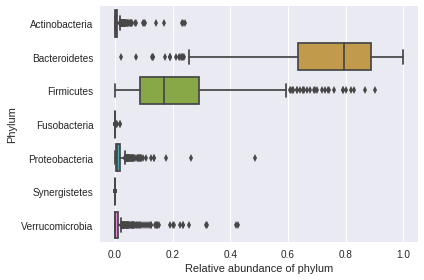

In [133]:
sns.boxplot(phylum_df.T, orient="h")
plt.xlabel("Relative abundance of phylum")
plt.ylabel("Phylum")

out_file = "%s/phylum-abundances.pdf" % (out_dir)
print("Writing to file %s" % (out_file))
plt.tight_layout()
plt.savefig(out_file)

In [91]:
colors = sns.color_palette("RdYl", 6) + \
            sns.color_palette("BuPu", 5) + \
            sns.color_palette("YlGn", 5) + \
            sns.color_palette("RdPu", 3)

ValueError: RdYl is not a valid palette name

In [285]:
def stackplot_abundances(df, df2=None, out_file=None, title='', title2='', xlabel='', ylabel=''):
    if df2 is None:
        fig, ax = plt.subplots()
        # plt.stackplot(range(len(df.columns)), df.values, labels=df.index, colors=sns.color_palette('husl', len(df.index)))
        plt.stackplot(range(len(df.columns)), df.values, labels=df.index, 
                      colors=sns.color_palette('Set2', len(df.index)))
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.35, 1.0))
    else:
        fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
        ax1.stackplot(range(len(df.columns)), df.values, labels=df.index, 
                      colors=sns.color_palette('Set2', len(df.index)))
        ax2.stackplot(range(len(df2.columns)), df2.values, labels=df2.index, 
                      colors=sns.color_palette('Set2', len(df2.index)))
        ax1.set_xlabel(xlabel)
        ax2.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        ax2.set_ylabel(ylabel)
        ax1.set_title(title)
        ax2.set_title(title2)
        ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, size=14)
        ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, size=14)
        
        plt.legend(bbox_to_anchor=(1.45, 1.0))
        

    if out_file is not None:
        print("Writing to %s" % (out_file))
        plt.savefig(out_file, bbox_inches='tight')
    plt.show()
    plt.close()

/home/jeffl/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  after removing the cwd from sys.path.


Writing to outputs/abundances/areaplot-phylum-abundances.pdf


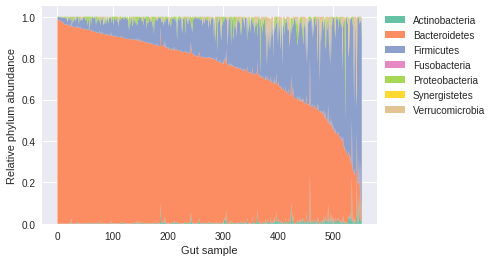

In [286]:
# sort the columns by the sum
# df.sum().sort_values()
# TODO figure out how to sort by multiple rows 
phylum_df = phylum_df.reindex_axis(phylum_df.T['Bacteroidetes'].sort_values(ascending=False).index, axis=1)
out_file = "%s/areaplot-phylum-abundances.pdf" % (out_dir)
stackplot_abundances(phylum_df, out_file=out_file, xlabel='Gut sample', ylabel='Relative phylum abundance')

Some of the samples don't go to 100% because I'm limiting the plot to Bacteria (i.e., excluding Archea and Viruses)

In [210]:
# redo the plot, but limited to the species for which we have models
# this file is created in another script
metaphlan_species_file = "%s/map-agora-to-metaphlan-unique.tsv" % (out_dir)
metaphlan_species = set()
with open(metaphlan_species_file, 'r') as f:
    for line in f:
        if line[0] == '#':
            continue
        metaphlan_species.add(line.rstrip().split('\t')[0])
print("%d species" % (len(metaphlan_species)))
# limit the abundances dataframe to these species
# I'm going to need to map the species to the phylum as well
# gut_samples_with_models = 

412 species


In [211]:
# read in the abundances file
df_ab = pd.read_csv(species_table_file, sep='\t', header=[0,1,2,3,4,5,6,7,8], index_col=0)
df_ab = df_ab.xs('Gut', axis=1, level="STArea", drop_level=False)
df_ab.columns = df_ab.columns.get_level_values("SRS")
# df.head()

Writing to outputs/abundances/areaplot-phylum-abundances-agora-models.pdf


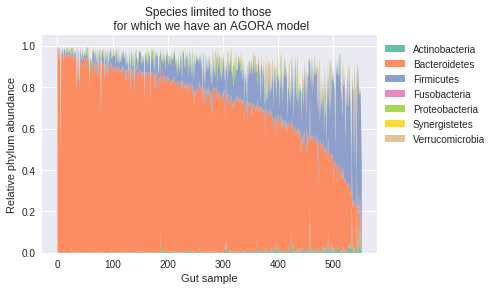

In [283]:
gut_samples_with_models = df_ab.reindex({s: metaphlan_to_agora[s] for s in gut_samples.index if s in metaphlan_to_agora})
# now map to the phylum abundance
# gut_samples_with_models_phylum = 
# for phylum in 
# gut_samples_with_models
species_to_phylum = {map_agora_to_metaphlan[s]: p for s, p in zip(microbes_df.organism, microbes_df.phylum) if s in map_agora_to_metaphlan}

df_agora_phylum_ab = gut_samples_with_models.groupby(by=species_to_phylum).sum()

# remove phylum with close to 0 (< 0.5%) abundances across all samples
df_agora_phylum_ab = df_agora_phylum_ab.drop(df_agora_phylum_ab.loc[df_agora_phylum_ab.sum(axis=1) < 0.005].index)
# also drop the archea for the plot
df_agora_phylum_ab = df_agora_phylum_ab.drop('Euryarchaeota')
# df_agora_phylum_ab
# # sort by bacteroides abundance
# df_agora_phylum_ab = df_agora_phylum_ab.reindex_axis(
#     df_agora_phylum_ab.T['Bacteroidetes'].sort_values(ascending=False).index, axis=1)
# sort by the original plot to better show side-by-side differences
df_agora_phylum_ab = df_agora_phylum_ab[phylum_df.columns]

# now plot
out_file = "%s/areaplot-phylum-abundances-agora-models.pdf" % (out_dir)
title = 'Species limited to those \n for which we have an AGORA model'
stackplot_abundances(df_agora_phylum_ab, out_file=out_file, title=title, xlabel='Gut sample', ylabel='Relative phylum abundance')

In [287]:
phylum_df.head()

SRS,SRS057049,SRS1041122,SRS020622,SRS062716,SRS018133,SRS016438,SRS018049,SRS013521,SRS1041113,SRS023583,...,SRS1041033,SRS013951,SRS063518,SRS014391,SRS016495,SRS015217,SRS016517,SRS015246,SRS149879,SRS146888
Actinobacteria,0,0.000097,0.000234,0.000275,0.003875,0.000421,0.000572,0.000848,0.001858,0.001170,...,0.233671,0.011423,0.001968,0.012531,0.144168,0.009968,0.169597,0.011179,0.022185,0.006161
Bacteroidetes,1,0.985179,0.983503,0.981353,0.980162,0.980006,0.978013,0.976834,0.974130,0.973517,...,0.212624,0.192747,0.190490,0.189886,0.173669,0.133392,0.130816,0.129456,0.073713,0.022949
Firmicutes,0,0.013777,0.015860,0.018109,0.011485,0.017327,0.021129,0.017301,0.019468,0.024650,...,0.215671,0.791508,0.803059,0.791837,0.676505,0.817807,0.693204,0.828560,0.902931,0.868723
Fusobacteria,0,0.000000,0.000071,0.000000,0.000000,0.000060,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000187
Proteobacteria,0,0.000947,0.000308,0.000223,0.004468,0.002186,0.000206,0.004929,0.004508,0.000663,...,0.001995,0.003613,0.002466,0.005103,0.005627,0.002589,0.006337,0.003608,0.000396,0.035515


In [288]:
df_agora_phylum_ab.head()

SRS,SRS057049,SRS1041122,SRS020622,SRS062716,SRS018133,SRS016438,SRS018049,SRS013521,SRS1041113,SRS023583,...,SRS1041033,SRS013951,SRS063518,SRS014391,SRS016495,SRS015217,SRS016517,SRS015246,SRS149879,SRS146888
Actinobacteria,0.0,0.000097,0.000234,0.000275,0.003875,0.000421,0.000518,0.000848,0.001858,0.001152,...,0.233672,0.011355,0.001727,0.012531,0.144168,0.008949,0.169515,0.010363,0.022114,0.005933
Bacteroidetes,1.0,0.981085,0.982408,0.925190,0.972847,0.971100,0.451169,0.948831,0.948193,0.963076,...,0.171870,0.190849,0.185206,0.187641,0.148800,0.133263,0.106657,0.129412,0.067920,0.015760
Firmicutes,0.0,0.011610,0.004661,0.012231,0.010707,0.013374,0.013902,0.012884,0.014732,0.019351,...,0.156693,0.646590,0.733853,0.643889,0.469462,0.629493,0.485714,0.644564,0.484464,0.414179
Fusobacteria,0.0,0.000000,0.000051,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000187
Proteobacteria,0.0,0.000930,0.000282,0.000223,0.004468,0.002050,0.000206,0.002514,0.002065,0.000584,...,0.001533,0.002245,0.002387,0.002857,0.005547,0.001861,0.006210,0.002890,0.000396,0.035261


In [277]:
# try to plot the reverse of the above graph to capture whats missing rather than what's similar
diff_df = phylum_df - df_agora_phylum_ab
# TODO make sure the diff_df is ordered the same as the phylum_df
diff_df = diff_df[phylum_df.columns]

In [278]:
diff_df.head()

SRS,SRS057049,SRS1041122,SRS020622,SRS062716,SRS018133,SRS016438,SRS018049,SRS013521,SRS1041113,SRS023583,...,SRS1041033,SRS013951,SRS063518,SRS014391,SRS016495,SRS015217,SRS016517,SRS015246,SRS149879,SRS146888
Actinobacteria,0.0,0.000000,2.710505e-20,0.000000,4.336809e-19,-1.000000e-07,0.000053,-1.084202e-19,1.000000e-07,0.000018,...,-8.000000e-07,0.000067,0.000241,0.000000,4.000000e-07,0.001019,0.000082,0.000817,7.110000e-05,0.000228
Bacteroidetes,0.0,0.004094,1.095500e-03,0.056163,7.315200e-03,8.905700e-03,0.526844,2.800340e-02,2.593660e-02,0.010441,...,4.075420e-02,0.001898,0.005284,0.002245,2.486900e-02,0.000129,0.024159,0.000044,5.792900e-03,0.007189
Firmicutes,0.0,0.002168,1.119860e-02,0.005878,7.781000e-04,3.953100e-03,0.007227,4.416500e-03,4.735300e-03,0.005299,...,5.897760e-02,0.144918,0.069206,0.147948,2.070430e-01,0.188314,0.207490,0.183996,4.184668e-01,0.454544
Fusobacteria,0.0,0.000000,2.030000e-05,0.000000,0.000000e+00,1.740000e-05,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000057,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000
Proteobacteria,0.0,0.000017,2.640000e-05,0.000000,0.000000e+00,1.363000e-04,0.000000,2.414900e-03,2.442800e-03,0.000079,...,4.620000e-04,0.001368,0.000079,0.002246,7.970000e-05,0.000728,0.000128,0.000718,-5.421011e-20,0.000253


In [294]:
def stackplot_abundances_diff(df, df2=None, out_file=None, title='', title2='', xlabel='', ylabel=''):
    if df2 is None:
        fig, ax = plt.subplots()
        # plt.stackplot(range(len(df.columns)), df.values, labels=df.index, colors=sns.color_palette('husl', len(df.index)))
        plt.stackplot(range(len(df.columns)), df.values, labels=df.index, 
                      colors=sns.color_palette('Set2', len(df.index)))
#         plt.gca().invert_yaxis()
#         plt.ylim(1, 0)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        plt.legend(bbox_to_anchor=(1.35, 1.0))
    else:
        fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
        ax1.stackplot(range(len(df.columns)), df.values, labels=df.index, 
                      colors=sns.color_palette('Set2', len(df.index)))
        ax2.stackplot(range(len(df2.columns)), df2.values, labels=df2.index, 
                      colors=sns.color_palette('Set2', len(df2.index)))
        ax1.set_xlabel(xlabel)
        ax2.set_xlabel(xlabel)
        ax1.set_ylabel(ylabel)
        ax2.set_ylabel(ylabel)
#         ax2.set_ylim(1, 0)
        ax1.set_title(title)
        ax2.set_title(title2)
        ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, size=14)
        ax2.text(-0.1, 1.05, 'B', transform=ax2.transAxes, size=14)
        
        plt.legend(bbox_to_anchor=(1.45, 1.0))
        

    if out_file is not None:
        print("Writing to %s" % (out_file))
        plt.savefig(out_file, bbox_inches='tight')
    plt.show()
    plt.close()

Writing to outputs/abundances/areaplot-phylum-missing-abundances.pdf


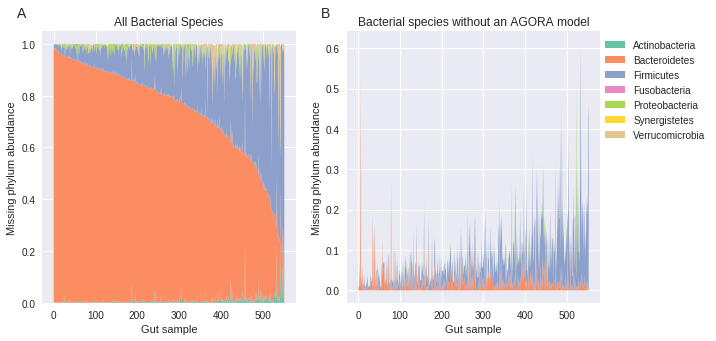

In [295]:
out_file = "%s/areaplot-phylum-missing-abundances.pdf" % (out_dir)
title = "All Bacterial Species"
title2 = 'Bacterial species without an AGORA model'
stackplot_abundances_diff(phylum_df, df2=diff_df, out_file=out_file, title=title, title2=title2, xlabel='Gut sample', ylabel='Missing phylum abundance')

We seem to be missing maily some of the Bacteroidetes, Firmicutes and Proteobacteria. On average, we have 90% of the abundance data.

Writing to outputs/abundances/areaplot-phylum-abundances-plus-agora-models.pdf


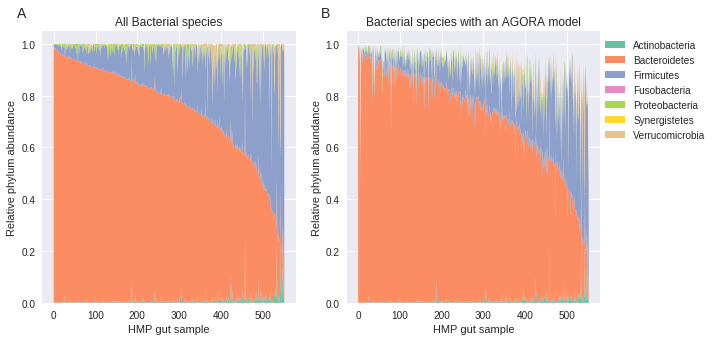

In [290]:
# plot both of them together
out_file = "%s/areaplot-phylum-abundances-plus-agora-models.pdf" % (out_dir)
title = "All Bacterial species"
title2 = 'Bacterial species with an AGORA model'
stackplot_abundances(phylum_df, df2=df_agora_phylum_ab, out_file=out_file, title=title, title2=title2, xlabel='HMP gut sample', ylabel='Relative phylum abundance')

In [84]:
import numpy as np
from sklearn.decomposition import PCA

In [93]:
non_zero_gut_microbes.index

Index([u'Methanobrevibacter_smithii', u'Methanobrevibacter_unclassified',
       u'Actinomyces_graevenitzii', u'Actinomyces_sp_ICM47',
       u'Actinomyces_sp_oral_taxon_448', u'Actinomyces_viscosus',
       u'Corynebacterium_accolens', u'Corynebacterium_matruchotii',
       u'Rothia_dentocariosa', u'Rothia_mucilaginosa',
       ...
       u'Schizosaccharomyces_pombe', u'Schizosaccharomyces_unclassified',
       u'C2likevirus_unclassified', u'Lactococcus_phage_bIL67',
       u'Bacteroides_phage_B124_14', u'Lactococcus_phage_BM13',
       u'Lactococcus_phage_P335_sensu_lato', u'Lactococcus_phage_P680',
       u'Tobacco_vein_clearing_virus', u'Vibrio_phage_pYD38_A'],
      dtype='object', length=268)

In [97]:
gut_samples.values
# get the non-zero rows
# doesn't really change anything
non_zero_gut_microbes = gut_samples.drop(gut_samples.loc[gut_samples.sum(axis=1) < 0.005].index)
print(len(non_zero_gut_microbes.values))
out_file = "%s/map-agora-to-metaphlan-unique-non-zero.tsv" % (out_dir)
print("Writing %s" % (out_file))
with open(out_file, 'w') as out:
    out.write(''.join("%s\t%s\n" % (metaphlan_to_agora[s], s) for s in non_zero_gut_microbes.index if s in metaphlan_to_agora))

268
Writing outputs/abundances/map-agora-to-metaphlan-unique-non-zero.tsv


In [85]:
pca = PCA(n_components=2)
pca.fit(gut_samples.values)
Y = pca.transform(gut_samples.values)



In [86]:
print(pca.explained_variance_ratio_)

[0.26056678 0.10533651]


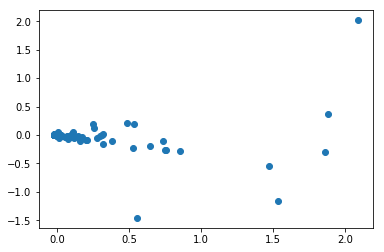

In [87]:
plt.plot()
plt.scatter(Y[:, 0], Y[:, 1])